# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import lines as mlines

# import files
fname1 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
#pd.set_option('display.max_rows', None)

#SMALL_SIZE = 10
#MEDIUM_SIZE = 15
#LARGE_SIZE = 20

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
climatological_data = data[data['Disaster Subgroup'] == 'Climatological']

# count number of disasters in each year for each subgroup
climatological_disaster_counts = climatological_data['Year'].value_counts().sort_index()

# save index of years
climatological_disaster_counts_index = climatological_disaster_counts.index

# sum costs by year
climatological_costs = climatological_data[['Year', 'Total Damages']]
climatological_costs = climatological_costs.groupby('Year').sum()
climatological_costs = climatological_costs.squeeze()

# SPLIT CLIMATOLOGICAL DISASTERS

In [4]:
# display unique types
for dtype in climatological_data['Disaster Type'].unique():
    print(dtype)

Drought
Wildfire


In [5]:
# create new dataframes for each type
drought_data = climatological_data[climatological_data['Disaster Type'] == 'Drought']
wildfire_data = climatological_data[climatological_data['Disaster Type'] == 'Wildfire']

# count number of disasters in each year for each subgroup
drought_disaster_counts = drought_data['Year'].value_counts().sort_index()
wildfire_disaster_counts = wildfire_data['Year'].value_counts()
wildfire_disaster_counts[1988] = 0
wildfire_disaster_counts = wildfire_disaster_counts.sort_index()
# save index of years
drought_disaster_counts_index = drought_disaster_counts.index
wildfire_disaster_counts_index = wildfire_disaster_counts.index

# CLIMATOLOGICAL DISASTER OCCURRENCE ANALYSIS

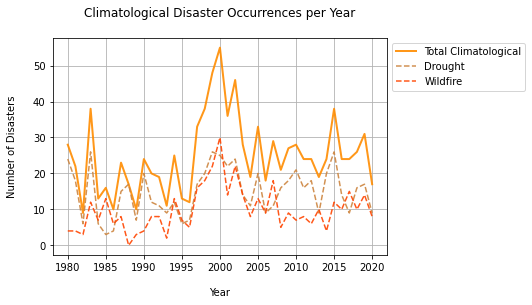

In [6]:
# CLIMATOLOGICAL DISASTER OCCURRENCE SINGLE LINE PLOT

plt.grid(axis = 'both')
plt.title("Climatological Disaster Occurrences per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Number of Disasters\n")
plt.plot(climatological_disaster_counts_index,climatological_disaster_counts, linewidth=2, color = 'darkorange', alpha = 0.9, label = 'Total Climatological')
plt.plot(drought_disaster_counts_index, drought_disaster_counts, linestyle = '--', color = 'peru', alpha = 0.9, label = 'Drought')
plt.plot(wildfire_disaster_counts_index, wildfire_disaster_counts, linestyle = '--', color = 'orangered', alpha = 0.9, label = 'Wildfire')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

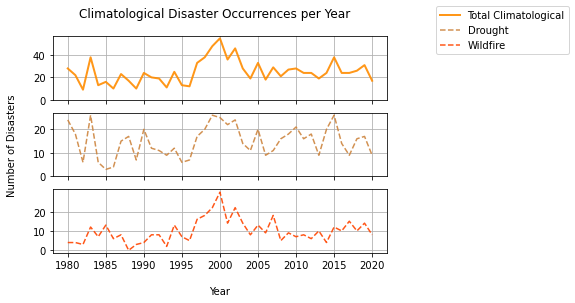

In [7]:
# CLIMATOLOGICAL DISASTER OCCURRENCE MULTIPLE LINE PLOTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Climatological Disaster Occurrences per Year\n")
axs[1].set_ylabel("Number of Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(climatological_disaster_counts_index, climatological_disaster_counts, linewidth=2, color = 'darkorange', alpha = 0.9, label = 'Total Climatological')
axs[1].plot(drought_disaster_counts_index, drought_disaster_counts, linestyle = '--', color = 'peru', alpha = 0.9, label = 'Drought')
axs[2].plot(wildfire_disaster_counts_index, wildfire_disaster_counts, linestyle = '--', color = 'orangered', alpha = 0.9, label = 'Wildfire')

plt.sca(axs[0])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

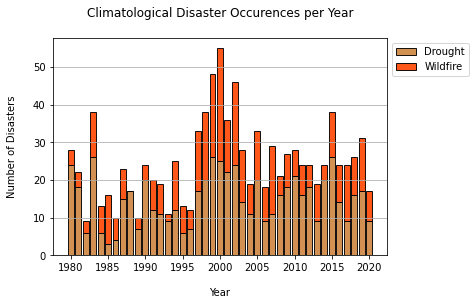

In [8]:
# CLIMATOLOGICAL DISASTER OCCURENCE SINGLE BAR CHART
plt.grid(axis = 'y')
plt.title("Climatological Disaster Occurences per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Number of Disasters\n")

plt.bar(drought_disaster_counts_index, drought_disaster_counts, edgecolor = 'black', color = 'peru', alpha = 0.9, label = 'Drought')
plt.bar(wildfire_disaster_counts_index, wildfire_disaster_counts, bottom = drought_disaster_counts, edgecolor = 'black', color = 'orangered', alpha = 0.9, label = 'Wildfire')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

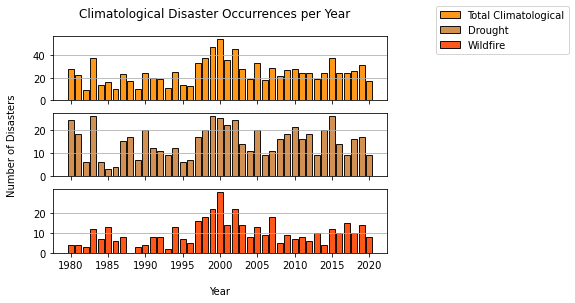

In [9]:
# CLIMATOLOGICAL DISASTER OCCURRENCE MULTIPLE BAR CHARTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Climatological Disaster Occurrences per Year\n")
axs[1].set_ylabel("Number of Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(climatological_disaster_counts_index, climatological_disaster_counts, color = 'darkorange', alpha = 0.9, edgecolor = 'black', label = 'Total Climatological')
axs[1].bar(drought_disaster_counts_index, drought_disaster_counts, edgecolor = 'black', color = 'peru', alpha = 0.9, label = 'Drought')
axs[2].bar(wildfire_disaster_counts_index, wildfire_disaster_counts, edgecolor = 'black', color = 'orangered', alpha = 0.9, label = 'Wildfire')

plt.sca(axs[0])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

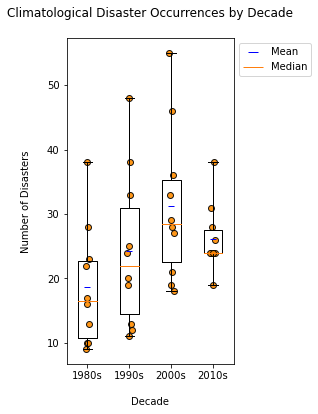

In [10]:
# CLIMATOLOGICAL DISASTER OCCURRENCE BOXPLOT

total_box_data = [climatological_disaster_counts[0:10], climatological_disaster_counts[10:20], climatological_disaster_counts[20:30], climatological_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Climatological Disaster Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("Number of Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,total_box_data[0], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'darkorange', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersPerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

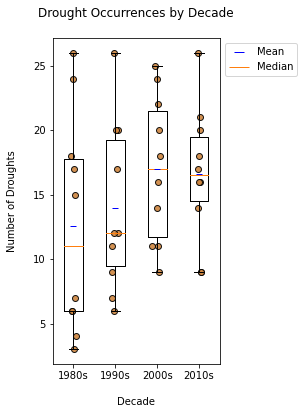

In [11]:
# DROUGHT OCCURRENCE BOXPLOT

drought_box_data = [drought_disaster_counts[0:10], drought_disaster_counts[10:20], drought_disaster_counts[20:30], drought_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Drought Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("Number of Droughts\n")

plt.boxplot(drought_box_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,drought_box_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,drought_box_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,drought_box_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,drought_box_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtsPerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

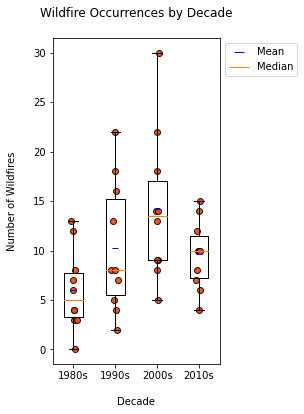

In [12]:
# WILDFIRE OCCURRENCE BOXPLOT

wildfire_box_data = [wildfire_disaster_counts[0:10], wildfire_disaster_counts[10:20], wildfire_disaster_counts[20:30], wildfire_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Wildfire Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("Number of Wildfires\n")

plt.boxplot(wildfire_box_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,wildfire_box_data[0], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,wildfire_box_data[1], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,wildfire_box_data[2], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,wildfire_box_data[3], color = 'orangered', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfiresPerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICS

In [13]:
# CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICS

print("CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICS")

# climatological disaster occurrence (total statistics)
print("\nClimatological disaster occurrence (total statistics): ")
print(climatological_disaster_counts.describe())

# climatological disaster occurrence (1980s statistics)
print("\nClimatological disaster occurrence (1980s statistics): ")
print(climatological_disaster_counts[0:10].describe())

# climatological disaster occurrence (1990s statistics)
print("\nClimatological disaster occurrence (1990s statistics): ")
print(climatological_disaster_counts[10:20].describe())

# climatological disaster occurrence (2000s statistics)
print("\nClimatological disaster occurrence (2000s statistics): ")
print(climatological_disaster_counts[20:30].describe())

# climatological disaster occurrence (2010s statistics)
print("\nClimatological disaster occurrence (2010s statistics): ")
print(climatological_disaster_counts[30:40].describe())

print("\n")

# CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of climatological disasters (1980s-2010s)
climatological_occurrence_mean_1980s = climatological_disaster_counts[0:10].mean()
climatological_occurrence_mean_2010s = climatological_disaster_counts[30:40].mean()
climatological_occurrence_mean_percent_change_1980_to_2020 = 100*(climatological_occurrence_mean_2010s-climatological_occurrence_mean_1980s)/climatological_occurrence_mean_1980s
print("Change in mean yearly number of climatological disasters (1980s-2010s): {:.2f}%".format(climatological_occurrence_mean_percent_change_1980_to_2020))

# change in maximum yearly number of climatological disasters (1980s-2010s)
climatological_occurrence_max_1980s = climatological_disaster_counts[0:10].max()
climatological_occurrence_max_2010s = climatological_disaster_counts[30:40].max()
climatological_occurrence_max_percent_change_1980_to_2020 = 100*(climatological_occurrence_max_2010s-climatological_occurrence_max_1980s)/climatological_occurrence_max_1980s
print("Change in maximum yearly number of climatological disasters (1980s-2010s): {:.2f}%".format(climatological_occurrence_max_percent_change_1980_to_2020))

# change in minimum yearly number of climatological disasters (1980s-2010s)
climatological_occurrence_min_1980s = climatological_disaster_counts[0:10].min()
climatological_occurrence_min_2010s = climatological_disaster_counts[30:40].min()
climatological_occurrence_min_percent_change_1980_to_2020 = 100*(climatological_occurrence_min_2010s-climatological_occurrence_min_1980s)/climatological_occurrence_min_1980s
print("Change in minimum yearly number of climatological disasters (1980s-2010s): {:.2f}%".format(climatological_occurrence_min_percent_change_1980_to_2020))

# change in standard deviation of yearly number of climatological disasters (1980s-2010s)
climatological_occurrence_std_1980s = climatological_disaster_counts[0:10].std()
climatological_occurrence_std_2010s = climatological_disaster_counts[30:40].std()
climatological_occurrence_std_percent_change_1980_to_2020 = 100*(climatological_occurrence_std_2010s-climatological_occurrence_std_1980s)/climatological_occurrence_std_1980s
print("Change in standard deviation of yearly number of climatological disasters (1980s-2010s): {:.2f}%\n".format(climatological_occurrence_std_percent_change_1980_to_2020))

CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICS

Climatological disaster occurrence (total statistics): 
count    41.000000
mean     24.878049
std      10.599988
min       9.000000
25%      18.000000
50%      24.000000
75%      29.000000
max      55.000000
Name: Year, dtype: float64

Climatological disaster occurrence (1980s statistics): 
count    10.000000
mean     18.600000
std       9.287985
min       9.000000
25%      10.750000
50%      16.500000
75%      22.750000
max      38.000000
Name: Year, dtype: float64

Climatological disaster occurrence (1990s statistics): 
count    10.000000
mean     24.300000
std      12.147702
min      11.000000
25%      14.500000
50%      22.000000
75%      31.000000
max      48.000000
Name: Year, dtype: float64

Climatological disaster occurrence (2000s statistics): 
count    10.0000
mean     31.2000
std      11.8865
min      18.0000
25%      22.5000
50%      28.5000
75%      35.2500
max      55.0000
Name: Year, dtype: float64

Climatological disaster o

In [14]:
# DROUGHT OCCURRENCE STATISTICS

print("DROUGHT OCCURRENCE STATISTICS")

# drought occurrence (total statistics)
print("\nDrought occurrence (total statistics): ")
print(drought_disaster_counts.describe())

# drought occurrence (1980s statistics)
print("\nDrought occurrence (1980s statistics): ")
print(drought_disaster_counts[0:10].describe())

# drought occurrence (1990s statistics)
print("\nDrought occurrence (1990s statistics): ")
print(drought_disaster_counts[10:20].describe())

# drought occurrence (2000s statistics)
print("\nDrought occurrence (2000s statistics): ")
print(drought_disaster_counts[20:30].describe())

# drought occurrence (2010s statistics)
print("\nDrought occurrence (2010s statistics): ")
print(drought_disaster_counts[30:40].describe())

print("\n")

# DROUGHT OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("DROUGHT OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of droughts (1980s-2010s)
drought_occurrence_mean_1980s = drought_disaster_counts[0:10].mean()
drought_occurrence_mean_2010s = drought_disaster_counts[30:40].mean()
drought_occurrence_mean_percent_change_1980_to_2020 = 100*(drought_occurrence_mean_2010s-drought_occurrence_mean_1980s)/drought_occurrence_mean_1980s
print("Change in mean yearly number of droughts (1980s-2010s): {:.2f}%".format(drought_occurrence_mean_percent_change_1980_to_2020))

# change in maximum yearly number of droughts (1980s-2010s)
drought_occurrence_max_1980s = drought_disaster_counts[0:10].max()
drought_occurrence_max_2010s = drought_disaster_counts[30:40].max()
drought_occurrence_max_percent_change_1980_to_2020 = 100*(drought_occurrence_max_2010s-drought_occurrence_max_1980s)/drought_occurrence_max_1980s
print("Change in maximum yearly number of droughts (1980s-2010s): {:.2f}%".format(drought_occurrence_max_percent_change_1980_to_2020))

# change in minimum yearly number of droughts (1980s-2010s)
drought_occurrence_min_1980s = drought_disaster_counts[0:10].min()
drought_occurrence_min_2010s = drought_disaster_counts[30:40].min()
drought_occurrence_min_percent_change_1980_to_2020 = 100*(drought_occurrence_min_2010s-drought_occurrence_min_1980s)/drought_occurrence_min_1980s
print("Change in minimum yearly number of droughts (1980s-2010s): {:.2f}%".format(drought_occurrence_min_percent_change_1980_to_2020))

# change in standard deviation of yearly number of droughts (1980s-2010s)
drought_occurrence_std_1980s = drought_disaster_counts[0:10].std()
drought_occurrence_std_2010s = drought_disaster_counts[30:40].std()
drought_occurrence_std_percent_change_1980_to_2020 = 100*(drought_occurrence_std_2010s-drought_occurrence_std_1980s)/drought_occurrence_std_1980s
print("Change in standard deviation of yearly number of droughts (1980s-2010s): {:.2f}%\n".format(drought_occurrence_std_percent_change_1980_to_2020))

DROUGHT OCCURRENCE STATISTICS

Drought occurrence (total statistics): 
count    41.000000
mean     14.902439
std       6.587127
min       3.000000
25%       9.000000
50%      16.000000
75%      20.000000
max      26.000000
Name: Year, dtype: float64

Drought occurrence (1980s statistics): 
count    10.0000
mean     12.6000
std       8.4879
min       3.0000
25%       6.0000
50%      11.0000
75%      17.7500
max      26.0000
Name: Year, dtype: float64

Drought occurrence (1990s statistics): 
count    10.000000
mean     14.000000
std       6.497863
min       6.000000
25%       9.500000
50%      12.000000
75%      19.250000
max      26.000000
Name: Year, dtype: float64

Drought occurrence (2000s statistics): 
count    10.000000
mean     17.000000
std       5.715476
min       9.000000
25%      11.750000
50%      17.000000
75%      21.500000
max      25.000000
Name: Year, dtype: float64

Drought occurrence (2010s statistics): 
count    10.000000
mean     16.600000
std       5.211099
min     

In [15]:
# WILDFIRE OCCURRENCE STATISTICS

print("WILDFIRE OCCURRENCE STATISTICS")

# wildfire occurrence (total statistics)
print("\nWildfire occurrence (total statistics): ")
print(wildfire_disaster_counts.describe())

# wildfire occurrence (1980s statistics)
print("\nWildfire occurrence (1980s statistics): ")
print(wildfire_disaster_counts[0:10].describe())

# wildfire occurrence (1990s statistics)
print("\nWildfire occurrence (1990s statistics): ")
print(wildfire_disaster_counts[10:20].describe())

# wildfire occurrence (2000s statistics)
print("\nWildfire occurrence (2000s statistics): ")
print(wildfire_disaster_counts[20:30].describe())

# wildfire occurrence (2010s statistics)
print("\nWildfire occurrence (2010s statistics): ")
print(wildfire_disaster_counts[30:40].describe())

print("\n")

# WILDFIRE OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("WILDFIRE OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of wildfires (1980s-2010s)
wildfire_occurrence_mean_1980s = wildfire_disaster_counts[0:10].mean()
wildfire_occurrence_mean_2010s = wildfire_disaster_counts[30:40].mean()
wildfire_occurrence_mean_percent_change_1980_to_2020 = 100*(wildfire_occurrence_mean_2010s-wildfire_occurrence_mean_1980s)/wildfire_occurrence_mean_1980s
print("Change in mean yearly number of wildfires (1980s-2010s): {:.2f}%".format(wildfire_occurrence_mean_percent_change_1980_to_2020))

# change in maximum yearly number of wildfires (1980s-2010s)
wildfire_occurrence_max_1980s = wildfire_disaster_counts[0:10].max()
wildfire_occurrence_max_2010s = wildfire_disaster_counts[30:40].max()
wildfire_occurrence_max_percent_change_1980_to_2020 = 100*(wildfire_occurrence_max_2010s-wildfire_occurrence_max_1980s)/wildfire_occurrence_max_1980s
print("Change in maximum yearly number of wildfires (1980s-2010s): {:.2f}%".format(wildfire_occurrence_max_percent_change_1980_to_2020))

# change in minimum yearly number of wildfires (1980s-2010s)
wildfire_occurrence_min_1980s = wildfire_disaster_counts[0:10].min()
wildfire_occurrence_min_2010s = wildfire_disaster_counts[30:40].min()
wildfire_occurrence_min_percent_change_1980_to_2020 = 100*(wildfire_occurrence_min_2010s-wildfire_occurrence_min_1980s)/wildfire_occurrence_min_1980s
print("Change in minimum yearly number of wildfires (1980s-2010s): {:.2f}%".format(wildfire_occurrence_min_percent_change_1980_to_2020))

# change in standard deviation of yearly number of wildfires (1980s-2010s)
wildfire_occurrence_std_1980s = wildfire_disaster_counts[0:10].std()
wildfire_occurrence_std_2010s = wildfire_disaster_counts[30:40].std()
wildfire_occurrence_std_percent_change_1980_to_2020 = 100*(wildfire_occurrence_std_2010s-wildfire_occurrence_std_1980s)/wildfire_occurrence_std_1980s
print("Change in standard deviation of yearly number of wildfires (1980s-2010s): {:.2f}%\n".format(wildfire_occurrence_std_percent_change_1980_to_2020))

WILDFIRE OCCURRENCE STATISTICS

Wildfire occurrence (total statistics): 
count    41.000000
mean      9.975610
std       6.125715
min       0.000000
25%       6.000000
50%       8.000000
75%      13.000000
max      30.000000
Name: Year, dtype: float64

Wildfire occurrence (1980s statistics): 
count    10.000000
mean      6.000000
std       4.109609
min       0.000000
25%       3.250000
50%       5.000000
75%       7.750000
max      13.000000
Name: Year, dtype: float64

Wildfire occurrence (1990s statistics): 
count    10.000000
mean     10.300000
std       6.617317
min       2.000000
25%       5.500000
50%       8.000000
75%      15.250000
max      22.000000
Name: Year, dtype: float64

Wildfire occurrence (2000s statistics): 
count    10.000000
mean     14.200000
std       7.480345
min       5.000000
25%       9.000000
50%      13.500000
75%      17.000000
max      30.000000
Name: Year, dtype: float64

Wildfire occurrence (2010s statistics): 
count    10.000000
mean      9.600000
std  

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in longlong_scalars


# YEAR OVER YEAR (YoY) CHANGE IN CLIMATOLOGICAL DISASTER OCCURRENCE ANALYSIS

In [16]:
# CALCULATE YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURRENCE

first_year = pd.Series([0])

climatological_disaster_change = [climatological_disaster_counts[i+1]-climatological_disaster_counts[i] for i in range(1980,2020)]
climatological_disaster_change = pd.Series(climatological_disaster_change)
climatological_disaster_change = first_year.append(climatological_disaster_change)
climatological_disaster_change = climatological_disaster_change.reset_index(drop = True)

drought_disaster_change = [drought_disaster_counts[i+1]-drought_disaster_counts[i] for i in range(1980,2020)]
drought_disaster_change = pd.Series(drought_disaster_change)
drought_disaster_change = first_year.append(drought_disaster_change)
drought_disaster_change = drought_disaster_change.reset_index(drop = True)

wildfire_disaster_change = [wildfire_disaster_counts[i+1]-wildfire_disaster_counts[i] for i in range(1980,2020)]
wildfire_disaster_change = pd.Series(wildfire_disaster_change)
wildfire_disaster_change = first_year.append(wildfire_disaster_change)
wildfire_disaster_change = wildfire_disaster_change.reset_index(drop = True)

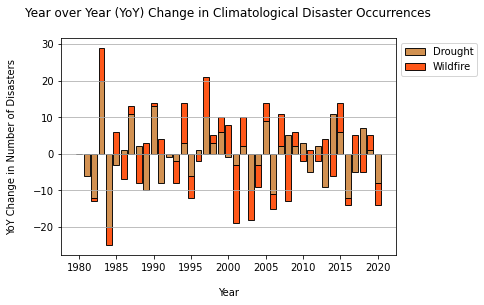

In [17]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURRENCE SINGLE BAR CHART

change_data = np.array([drought_disaster_change, wildfire_disaster_change])

data_shape = np.shape(change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(change_data, **kwargs):
    cum = change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(change_data, min=0)
cumulated_data_neg = get_cumulated_array(change_data, max=0)

# Re-merge negative and positive data.
row_mask = (change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["peru", "orangered"]
labs = ["Drought", "Wildfire"]

fig = plt.figure()
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1980, 2021), change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Year over Year (YoY) Change in Climatological Disaster Occurrences\n")
plt.xlabel("\nYear")
plt.ylabel("YoY Change in Number of Disasters\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

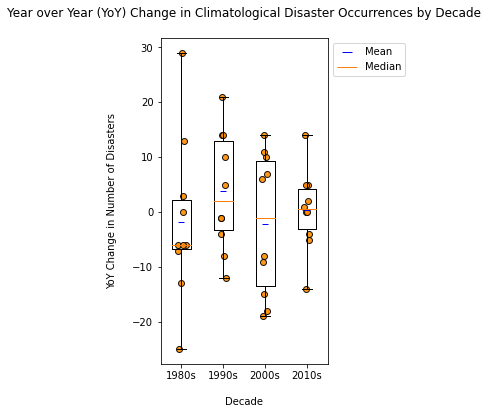

In [18]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURRENCE BOXPLOT

total_box_data = [climatological_disaster_change[0:10], climatological_disaster_change[10:20], climatological_disaster_change[20:30], climatological_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Climatological Disaster Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,total_box_data[0], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'darkorange', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersChangePerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

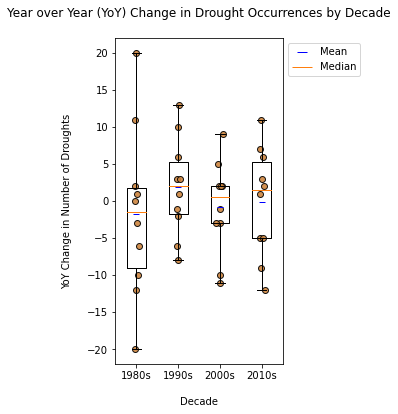

In [19]:
# YoY CHANGE IN DROUGHT OCCURRENCE BOXPLOT

total_box_data = [drought_disaster_change[0:10], drought_disaster_change[10:20], drought_disaster_change[20:30], drought_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Drought Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Droughts\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,total_box_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtsChangePerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

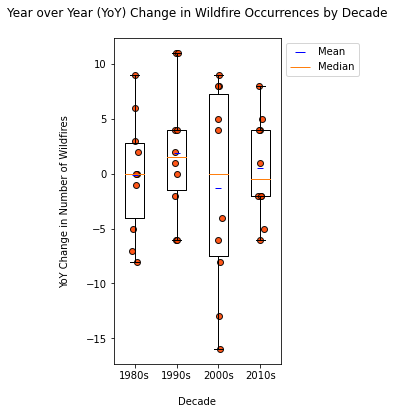

In [20]:
# YoY CHANGE IN WILDFIRE OCCURRENCE BOXPLOT

total_box_data = [wildfire_disaster_change[0:10], wildfire_disaster_change[10:20], wildfire_disaster_change[20:30], wildfire_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Wildfire Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Wildfires\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,total_box_data[0], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'orangered', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfiresChangePerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# YEAR OVER YEAR (YoY) CHANGE IN CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICS

In [21]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICS

print("YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICS")

# YoY change in climatological disaster occurrence (total statistics)
print("\nYoY change in climatological disaster occurrence (total statistics): ")
print(climatological_disaster_change.describe())

# YoY change in climatological disaster occurrence (1980s statistics)
print("\nYoY change in climatological disaster occurrence (1980s statistics): ")
print(climatological_disaster_change[0:10].describe())

# YoY change in climatological disaster occurrence (1990s statistics)
print("\nYoY change in climatological disaster occurrence (1990s statistics): ")
print(climatological_disaster_change[10:20].describe())

# YoY change in climatological disaster occurrence (2000s statistics)
print("\nYoY change in climatological disaster occurrence (2000s statistics): ")
print(climatological_disaster_change[20:30].describe())

# YoY change in climatological disaster occurrence (2010s statistics)
print("\nYoY change in climatological disaster occurrence (2010s statistics): ")
print(climatological_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in natural disaster occurrence (1980s-2010s)
climatological_occurrence_yoy_change_mean_1980s = climatological_disaster_change[0:10].mean()
climatological_occurrence_yoy_change_mean_2010s = climatological_disaster_change[30:40].mean()
climatological_occurrence_yoy_change_mean_percent_change_1980_to_2020 = 100*(climatological_occurrence_yoy_change_mean_2010s-climatological_occurrence_yoy_change_mean_1980s)/abs(climatological_occurrence_yoy_change_mean_1980s)
print("Change in mean YoY change in climatological disaster occurrence (1980s-2010s): {:.2f}%".format(climatological_occurrence_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in natural disaster occurrence (1980s-2010s)
climatological_occurrence_yoy_change_max_1980s = climatological_disaster_change[0:10].max()
climatological_occurrence_yoy_change_max_2010s = climatological_disaster_change[30:40].max()
climatological_occurrence_yoy_change_max_percent_change_1980_to_2020 = 100*(climatological_occurrence_yoy_change_max_2010s-climatological_occurrence_yoy_change_max_1980s)/abs(climatological_occurrence_yoy_change_max_1980s)
print("Change in maximum YoY change in climatological disaster occurrence (1980s-2010s): {:.2f}%".format(climatological_occurrence_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in natural disaster occurrence (1980s-2010s)
climatological_occurrence_yoy_change_min_1980s = climatological_disaster_change[0:10].min()
climatological_occurrence_yoy_change_min_2010s = climatological_disaster_change[30:40].min()
climatological_occurrence_yoy_change_min_percent_change_1980_to_2020 = 100*(climatological_occurrence_yoy_change_min_2010s-climatological_occurrence_yoy_change_min_1980s)/abs(climatological_occurrence_yoy_change_min_1980s)
print("Change in minimum YoY change in climatological disaster occurrence (1980s-2010s): {:.2f}%".format(climatological_occurrence_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in natural disaster occurrence (1980s-2010s)
climatological_occurrence_yoy_change_std_1980s = climatological_disaster_change[0:10].std()
climatological_occurrence_yoy_change_std_2010s = climatological_disaster_change[30:40].std()
climatological_occurrence_yoy_change_std_percent_change_1980_to_2020 = 100*(climatological_occurrence_yoy_change_std_2010s-climatological_occurrence_yoy_change_std_1980s)/abs(climatological_occurrence_yoy_change_std_1980s)
print("Change in standard deviation YoY change in climatological disaster occurrence (1980s-2010s): {:.2f}%".format(climatological_occurrence_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURRENCE STATISTICS

YoY change in climatological disaster occurrence (total statistics): 
count    41.000000
mean     -0.268293
std      11.610393
min     -25.000000
25%      -8.000000
50%       0.000000
75%       7.000000
max      29.000000
dtype: float64

YoY change in climatological disaster occurrence (1980s statistics): 
count    10.000000
mean     -1.800000
std      14.672726
min     -25.000000
25%      -6.750000
50%      -6.000000
75%       2.250000
max      29.000000
dtype: float64

YoY change in climatological disaster occurrence (1990s statistics): 
count    10.00000
mean      3.80000
std      10.74761
min     -12.00000
25%      -3.25000
50%       2.00000
75%      13.00000
max      21.00000
dtype: float64

YoY change in climatological disaster occurrence (2000s statistics): 
count    10.000000
mean     -2.100000
std      12.965338
min     -19.000000
25%     -13.500000
50%      -1.000000
75%       9.250000
max      14.000000
dtype: floa

In [22]:
# YoY CHANGE IN DROUGHT OCCURRENCE STATISTICS

print("YoY CHANGE IN DROUGHT DISASTER OCCURRENCE STATISTICS")

# YoY change in drought disaster occurrence (total statistics)
print("\nYoY change in drought disaster occurrence (total statistics): ")
print(drought_disaster_change.describe())

# YoY change in drought disaster occurrence (1980s statistics)
print("\nYoY change in drought disaster occurrence (1980s statistics): ")
print(drought_disaster_change[0:10].describe())

# YoY change in drought disaster occurrence (1990s statistics)
print("\nYoY change in drought disaster occurrence (1990s statistics): ")
print(drought_disaster_change[10:20].describe())

# YoY change in drought disaster occurrence (2000s statistics)
print("\nYoY change in drought disaster occurrence (2000s statistics): ")
print(drought_disaster_change[20:30].describe())

# YoY change in drought disaster occurrence (2010s statistics)
print("\nYoY change in drought disaster occurrence (2010s statistics): ")
print(drought_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN DROUGHT DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN DROUGHT DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in natural disaster occurrence (1980s-2010s)
drought_occurrence_yoy_change_mean_1980s = drought_disaster_change[0:10].mean()
drought_occurrence_yoy_change_mean_2010s = drought_disaster_change[30:40].mean()
drought_occurrence_yoy_change_mean_percent_change_1980_to_2020 = 100*(drought_occurrence_yoy_change_mean_2010s-drought_occurrence_yoy_change_mean_1980s)/abs(drought_occurrence_yoy_change_mean_1980s)
print("Change in mean YoY change in drought disaster occurrence (1980s-2010s): {:.2f}%".format(drought_occurrence_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in natural disaster occurrence (1980s-2010s)
drought_occurrence_yoy_change_max_1980s = drought_disaster_change[0:10].max()
drought_occurrence_yoy_change_max_2010s = drought_disaster_change[30:40].max()
drought_occurrence_yoy_change_max_percent_change_1980_to_2020 = 100*(drought_occurrence_yoy_change_max_2010s-drought_occurrence_yoy_change_max_1980s)/abs(drought_occurrence_yoy_change_max_1980s)
print("Change in maximum YoY change in drought disaster occurrence (1980s-2010s): {:.2f}%".format(drought_occurrence_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in natural disaster occurrence (1980s-2010s)
drought_occurrence_yoy_change_min_1980s = drought_disaster_change[0:10].min()
drought_occurrence_yoy_change_min_2010s = drought_disaster_change[30:40].min()
drought_occurrence_yoy_change_min_percent_change_1980_to_2020 = 100*(drought_occurrence_yoy_change_min_2010s-drought_occurrence_yoy_change_min_1980s)/abs(drought_occurrence_yoy_change_min_1980s)
print("Change in minimum YoY change in drought disaster occurrence (1980s-2010s): {:.2f}%".format(drought_occurrence_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in natural disaster occurrence (1980s-2010s)
drought_occurrence_yoy_change_std_1980s = drought_disaster_change[0:10].std()
drought_occurrence_yoy_change_std_2010s = drought_disaster_change[30:40].std()
drought_occurrence_yoy_change_std_percent_change_1980_to_2020 = 100*(drought_occurrence_yoy_change_std_2010s-drought_occurrence_yoy_change_std_1980s)/abs(drought_occurrence_yoy_change_std_1980s)
print("Change in standard deviation YoY change in drought disaster occurrence (1980s-2010s): {:.2f}%".format(drought_occurrence_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN DROUGHT DISASTER OCCURRENCE STATISTICS

YoY change in drought disaster occurrence (total statistics): 
count    41.000000
mean     -0.365854
std       7.992985
min     -20.000000
25%      -6.000000
50%       1.000000
75%       3.000000
max      20.000000
dtype: float64

YoY change in drought disaster occurrence (1980s statistics): 
count    10.000000
mean     -1.700000
std      11.479934
min     -20.000000
25%      -9.000000
50%      -1.500000
75%       1.750000
max      20.000000
dtype: float64

YoY change in drought disaster occurrence (1990s statistics): 
count    10.000000
mean      1.900000
std       6.607235
min      -8.000000
25%      -1.750000
50%       2.000000
75%       5.250000
max      13.000000
dtype: float64

YoY change in drought disaster occurrence (2000s statistics): 
count    10.000000
mean     -0.800000
std       6.250333
min     -11.000000
25%      -3.000000
50%       0.500000
75%       2.000000
max       9.000000
dtype: float64

YoY change in drought 

In [23]:
# YoY CHANGE IN WILDFIRE OCCURRENCE STATISTICS

print("YoY CHANGE IN WILDFIRE DISASTER OCCURRENCE STATISTICS")

# YoY change in wildfire disaster occurrence (total statistics)
print("\nYoY change in wildfire disaster occurrence (total statistics): ")
print(wildfire_disaster_change.describe())

# YoY change in wildfire disaster occurrence (1980s statistics)
print("\nYoY change in wildfire disaster occurrence (1980s statistics): ")
print(wildfire_disaster_change[0:10].describe())

# YoY change in wildfire disaster occurrence (1990s statistics)
print("\nYoY change in wildfire disaster occurrence (1990s statistics): ")
print(wildfire_disaster_change[10:20].describe())

# YoY change in wildfire disaster occurrence (2000s statistics)
print("\nYoY change in wildfire disaster occurrence (2000s statistics): ")
print(wildfire_disaster_change[20:30].describe())

# YoY change in wildfire disaster occurrence (2010s statistics)
print("\nYoY change in wildfire disaster occurrence (2010s statistics): ")
print(wildfire_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN WILDFIRE DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN WILDFIRE DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in natural disaster occurrence (1980s-2010s)
wildfire_occurrence_yoy_change_mean_1980s = wildfire_disaster_change[0:10].mean()
wildfire_occurrence_yoy_change_mean_2010s = wildfire_disaster_change[30:40].mean()
wildfire_occurrence_yoy_change_mean_percent_change_1980_to_2020 = 100*(wildfire_occurrence_yoy_change_mean_2010s-wildfire_occurrence_yoy_change_mean_1980s)/abs(wildfire_occurrence_yoy_change_mean_1980s)
print("Change in mean YoY change in wildfire disaster occurrence (1980s-2010s): {:.2f}%".format(wildfire_occurrence_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in natural disaster occurrence (1980s-2010s)
wildfire_occurrence_yoy_change_max_1980s = wildfire_disaster_change[0:10].max()
wildfire_occurrence_yoy_change_max_2010s = wildfire_disaster_change[30:40].max()
wildfire_occurrence_yoy_change_max_percent_change_1980_to_2020 = 100*(wildfire_occurrence_yoy_change_max_2010s-wildfire_occurrence_yoy_change_max_1980s)/abs(wildfire_occurrence_yoy_change_max_1980s)
print("Change in maximum YoY change in wildfire disaster occurrence (1980s-2010s): {:.2f}%".format(wildfire_occurrence_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in natural disaster occurrence (1980s-2010s)
wildfire_occurrence_yoy_change_min_1980s = wildfire_disaster_change[0:10].min()
wildfire_occurrence_yoy_change_min_2010s = wildfire_disaster_change[30:40].min()
wildfire_occurrence_yoy_change_min_percent_change_1980_to_2020 = 100*(wildfire_occurrence_yoy_change_min_2010s-wildfire_occurrence_yoy_change_min_1980s)/abs(wildfire_occurrence_yoy_change_min_1980s)
print("Change in minimum YoY change in wildfire disaster occurrence (1980s-2010s): {:.2f}%".format(wildfire_occurrence_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in natural disaster occurrence (1980s-2010s)
wildfire_occurrence_yoy_change_std_1980s = wildfire_disaster_change[0:10].std()
wildfire_occurrence_yoy_change_std_2010s = wildfire_disaster_change[30:40].std()
wildfire_occurrence_yoy_change_std_percent_change_1980_to_2020 = 100*(wildfire_occurrence_yoy_change_std_2010s-wildfire_occurrence_yoy_change_std_1980s)/abs(wildfire_occurrence_yoy_change_std_1980s)
print("Change in standard deviation YoY change in wildfire disaster occurrence (1980s-2010s): {:.2f}%".format(wildfire_occurrence_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN WILDFIRE DISASTER OCCURRENCE STATISTICS

YoY change in wildfire disaster occurrence (total statistics): 
count    41.000000
mean      0.097561
std       6.414066
min     -16.000000
25%      -5.000000
50%       0.000000
75%       4.000000
max      11.000000
dtype: float64

YoY change in wildfire disaster occurrence (1980s statistics): 
count    10.000000
mean     -0.100000
std       5.466057
min      -8.000000
25%      -4.000000
50%       0.000000
75%       2.750000
max       9.000000
dtype: float64

YoY change in wildfire disaster occurrence (1990s statistics): 
count    10.00000
mean      1.90000
std       5.95259
min      -6.00000
25%      -1.50000
50%       1.50000
75%       4.00000
max      11.00000
dtype: float64

YoY change in wildfire disaster occurrence (2000s statistics): 
count    10.000000
mean     -1.300000
std       9.274218
min     -16.000000
25%      -7.500000
50%       0.000000
75%       7.250000
max       9.000000
dtype: float64

YoY change in wildfire di

# CLIMATOLOGICAL DISASTER YEARLY DAMAGES ANALYSIS

In [24]:
drought_costs = drought_data[['Year', 'Total Damages']]
drought_costs = drought_costs.groupby('Year').sum()
drought_costs = drought_costs.squeeze()

wildfire_costs = wildfire_data[['Year', 'Total Damages']]
wildfire_costs = wildfire_costs.groupby('Year').sum()
wildfire_costs = wildfire_costs.squeeze()
wildfire_costs[1988] = 0
wildfire_costs = wildfire_costs.sort_index()

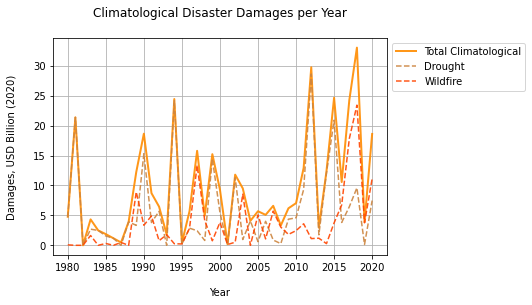

In [25]:
# CLIMATOLOGICAL DISASTER YEARLY DAMAGES SINGLE LINE PLOT

plt.grid(axis = 'both')
plt.title("Climatological Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Damages, USD Billion (2020)\n")
plt.plot(climatological_costs.index, climatological_costs, linewidth=2, color = 'darkorange', alpha = 0.9, label = 'Total Climatological')
plt.plot(drought_costs.index, drought_costs, linestyle = '--', color = 'peru', alpha = 0.9, label = 'Drought')
plt.plot(wildfire_costs.index, wildfire_costs, linestyle = '--', color = 'orangered', alpha = 0.9, label = 'Wildfire')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

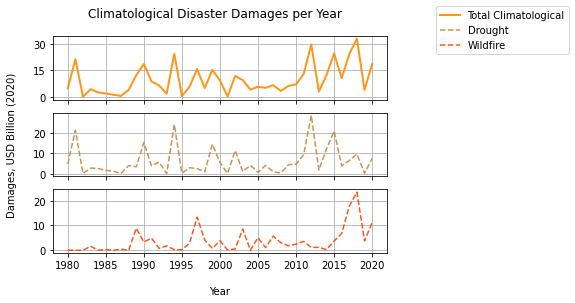

In [26]:
# CLIMATOLOGICAL DISASTER YEARLY DAMAGES MULTIPLE LINE PLOTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Climatological Disaster Damages per Year\n")
axs[1].set_ylabel("Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(climatological_costs.index, climatological_costs, linewidth=2, color = 'darkorange', alpha = 0.9, label = 'Total Climatological')
axs[1].plot(drought_costs.index, drought_costs, linestyle = '--', color = 'peru', alpha = 0.9, label = 'Drought')
axs[2].plot(wildfire_costs.index, wildfire_costs, linestyle = '--', color = 'orangered', alpha = 0.9, label = 'Wildfire')

plt.sca(axs[0])
plt.yticks(np.linspace(0,30,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

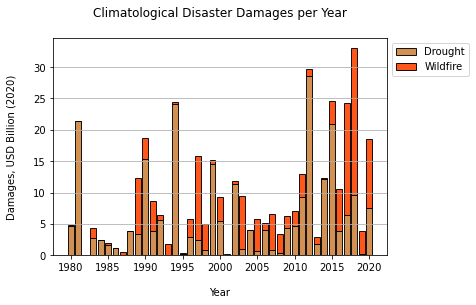

In [27]:
# CLIMATOLOGICAL DISASTER YEARLY DAMAGES SINGLE BAR CHART

plt.grid(axis = 'y')
plt.title("Climatological Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Damages, USD Billion (2020)\n")

plt.bar(drought_costs.index, drought_costs, edgecolor = 'black', color = 'peru', alpha = 0.9, label = 'Drought')
plt.bar(wildfire_costs.index, wildfire_costs, bottom = drought_costs, edgecolor = 'black', color = 'orangered', alpha = 0.9, label = 'Wildfire')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

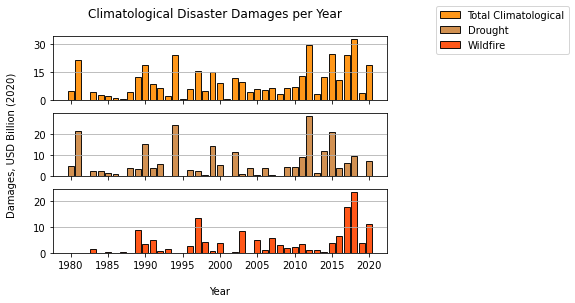

In [28]:
# CLIMATOLOGICAL DISASTER YEARLY DAMAGES MULTIPLE BAR CHARTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Climatological Disaster Damages per Year\n")
axs[1].set_ylabel("Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(climatological_costs.index, climatological_costs, color = 'darkorange', alpha = 0.9, edgecolor = 'black', label = 'Total Climatological')
axs[1].bar(drought_costs.index, drought_costs, color = 'peru', alpha = 0.9, edgecolor = 'black', label = 'Drought')
axs[2].bar(wildfire_costs.index, wildfire_costs, color = 'orangered', alpha = 0.9, edgecolor = 'black', label = 'Wildfire')

plt.sca(axs[0])
plt.yticks(np.linspace(0,30,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

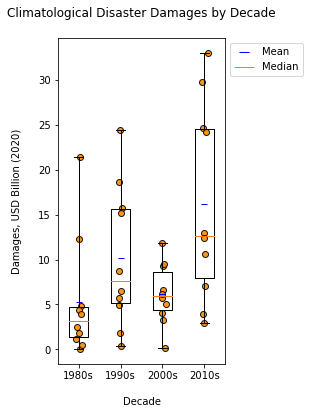

In [29]:
# CLIMATOLOGICAL DISASTER YEARLY DAMAGES BOXPLOT

climatological_box_data = [climatological_costs[0:10], climatological_costs[10:20], climatological_costs[20:30], climatological_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Climatological Disaster Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("Damages, USD Billion (2020)\n")

plt.boxplot(climatological_box_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,climatological_box_data[0], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,climatological_box_data[1], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,climatological_box_data[2], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,climatological_box_data[3], color = 'darkorange', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

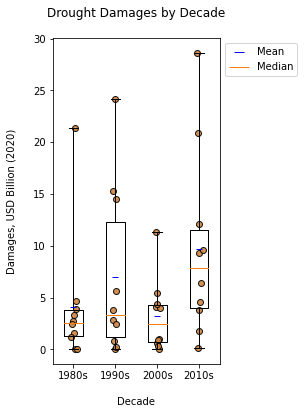

In [30]:
# DROUGHT YEARLY DAMAGES BOXPLOT

drought_box_data = [drought_costs[0:10], drought_costs[10:20], drought_costs[20:30], drought_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Drought Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("Damages, USD Billion (2020)\n")

plt.boxplot(drought_box_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,drought_box_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,drought_box_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,drought_box_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,drought_box_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtCostsPerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

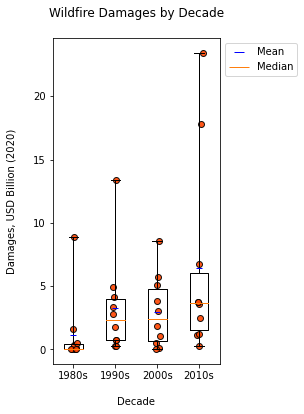

In [31]:
# WILDFIRE YEARLY DAMAGES BOXPLOT

wildfire_box_data = [wildfire_costs[0:10], wildfire_costs[10:20], wildfire_costs[20:30], wildfire_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Wildfire Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("Damages, USD Billion (2020)\n")

plt.boxplot(wildfire_box_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,wildfire_box_data[0], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,wildfire_box_data[1], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,wildfire_box_data[2], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,wildfire_box_data[3], color = 'orangered', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfireCostsPerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# CLIMATOLOGICAL DISASTER YEARLY DAMAGES STATISTICS

In [32]:
# CLIMATOLOGICAL DISASTER YEARLY DAMAGES STATISTICS

print("CLIMATOLOGICAL DISASTER YEARLY DAMAGES STATISTICS")

# climatological disaster yearly damages (total statistics)
print("\nClimatological disaster yearly damages (total statistics): ")
print(climatological_costs.describe())

# climatological disaster yearly damages (1980s statistics)
print("\nClimatological disaster yearly damages (1980s statistics): ")
print(climatological_costs[0:10].describe())

# climatological disaster yearly damages (1990s statistics)
print("\nClimatological disaster yearly damages (1990s statistics): ")
print(climatological_costs[10:20].describe())

# climatological disaster yearly damages (2000s statistics)
print("\nClimatological disaster yearly damages (2000s statistics): ")
print(climatological_costs[20:30].describe())

# climatological disaster yearly damages (2010s statistics)
print("\nClimatological disaster yearly damages (2010s statistics): ")
print(climatological_costs[30:40].describe())

print("\n")

# CLIMATOLOGICAL DISASTER YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("CLIMATOLOGICAL DISASTER YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean climatological disaster yearly damages (1980s-2010s)
climatological_damages_mean_1980s = climatological_costs[0:10].mean()
climatological_damages_mean_2010s = climatological_costs[30:40].mean()
climatological_damages_mean_percent_change_1980_to_2020 = 100*(climatological_damages_mean_2010s-climatological_damages_mean_1980s)/abs(climatological_damages_mean_1980s)
print("Change in mean climatological disaster yearly damages (1980s-2010s): {:.2f}%".format(climatological_damages_mean_percent_change_1980_to_2020))

# change in maximum climatological disaster yearly damages (1980s-2010s)
climatological_damages_max_1980s = climatological_costs[0:10].max()
climatological_damages_max_2010s = climatological_costs[30:40].max()
climatological_damages_max_percent_change_1980_to_2020 = 100*(climatological_damages_max_2010s-climatological_damages_max_1980s)/abs(climatological_damages_max_1980s)
print("Change in maximum climatological disaster yearly damages (1980s-2010s): {:.2f}%".format(climatological_damages_max_percent_change_1980_to_2020))

# change in minimum climatological disaster yearly damages (1980s-2010s)
climatological_damages_min_1980s = climatological_costs[0:10].min()
climatological_damages_min_2010s = climatological_costs[30:40].min()
climatological_damages_min_percent_change_1980_to_2020 = 100*(climatological_damages_min_2010s-climatological_damages_min_1980s)/abs(climatological_damages_min_1980s)
print("Change in minimum climatological disaster yearly damages (1980s-2010s): {:.2f}%".format(climatological_damages_min_percent_change_1980_to_2020))

# change in standard deviation of climatological disaster yearly damages (1980s-2010s)
climatological_damages_std_1980s = climatological_costs[0:10].std()
climatological_damages_std_2010s = climatological_costs[30:40].std()
climatological_damages_std_percent_change_1980_to_2020 = 100*(climatological_damages_std_2010s-climatological_damages_std_1980s)/abs(climatological_damages_std_1980s)
print("Change in standard deviation of climatological disaster yearly damages (1980s-2010s): {:.2f}%\n".format(climatological_damages_std_percent_change_1980_to_2020))

CLIMATOLOGICAL DISASTER YEARLY DAMAGES STATISTICS

Climatological disaster yearly damages (total statistics): 
count    41.000000
mean      9.677076
std       8.590469
min       0.000000
25%       3.901167
50%       6.459137
75%      12.936397
max      33.035825
Name: Total Damages, dtype: float64

Climatological disaster yearly damages (1980s statistics): 
count    10.000000
mean      5.268973
std       6.650199
min       0.000000
25%       1.349829
50%       3.209343
75%       4.671573
max      21.384256
Name: Total Damages, dtype: float64

Climatological disaster yearly damages (1990s statistics): 
count    10.000000
mean     10.216700
std       7.899228
min       0.418676
25%       5.138738
50%       7.588558
75%      15.651043
max      24.449320
Name: Total Damages, dtype: float64

Climatological disaster yearly damages (2000s statistics): 
count    10.000000
mean      6.179280
std       3.378803
min       0.184159
25%       4.339011
50%       5.941260
75%       8.632401
max      

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in double_scalars


In [33]:
# DROUGHT YEARLY DAMAGES STATISTICS

print("DROUGHT YEARLY DAMAGES STATISTICS")

# drought yearly damages (total statistics)
print("\nDrought yearly damages (total statistics): ")
print(drought_costs.describe())

# drought yearly damages (1980s statistics)
print("\nDrought yearly damages (1980s statistics): ")
print(drought_costs[0:10].describe())

# drought yearly damages (1990s statistics)
print("\nDrought yearly damages (1990s statistics): ")
print(drought_costs[10:20].describe())

# drought yearly damages (2000s statistics)
print("\nDrought yearly damages (2000s statistics): ")
print(drought_costs[20:30].describe())

# drought yearly damages (2010s statistics)
print("\nDrought yearly damages (2010s statistics): ")
print(drought_costs[30:40].describe())

print("\n")

# DROUGHT YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("DROUGHT YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean drought yearly damages (1980s-2010s)
drought_damages_mean_1980s = drought_costs[0:10].mean()
drought_damages_mean_2010s = drought_costs[30:40].mean()
drought_damages_mean_percent_change_1980_to_2020 = 100*(drought_damages_mean_2010s-drought_damages_mean_1980s)/abs(drought_damages_mean_1980s)
print("Change in mean drought yearly damages (1980s-2010s): {:.2f}%".format(drought_damages_mean_percent_change_1980_to_2020))

# change in maximum drought yearly damages (1980s-2010s)
drought_damages_max_1980s = drought_costs[0:10].max()
drought_damages_max_2010s = drought_costs[30:40].max()
drought_damages_max_percent_change_1980_to_2020 = 100*(drought_damages_max_2010s-drought_damages_max_1980s)/abs(drought_damages_max_1980s)
print("Change in maximum drought yearly damages (1980s-2010s): {:.2f}%".format(drought_damages_max_percent_change_1980_to_2020))

# change in minimum drought yearly damages (1980s-2010s)
drought_damages_min_1980s = drought_costs[0:10].min()
drought_damages_min_2010s = drought_costs[30:40].min()
drought_damages_min_percent_change_1980_to_2020 = 100*(drought_damages_min_2010s-drought_damages_min_1980s)/abs(drought_damages_min_1980s)
print("Change in minimum drought yearly damages (1980s-2010s): {:.2f}%".format(drought_damages_min_percent_change_1980_to_2020))

# change in standard deviation of drought yearly damages (1980s-2010s)
drought_damages_std_1980s = drought_costs[0:10].std()
drought_damages_std_2010s = drought_costs[30:40].std()
drought_damages_std_percent_change_1980_to_2020 = 100*(drought_damages_std_2010s-drought_damages_std_1980s)/abs(drought_damages_std_1980s)
print("Change in standard deviation of drought yearly damages (1980s-2010s): {:.2f}%\n".format(drought_damages_std_percent_change_1980_to_2020))

DROUGHT YEARLY DAMAGES STATISTICS

Drought yearly damages (total statistics): 
count    41.000000
mean      6.045993
std       7.151921
min       0.000000
25%       0.969036
50%       3.820190
75%       7.475883
max      28.631512
Name: Total Damages, dtype: float64

Drought yearly damages (1980s statistics): 
count    10.000000
mean      4.126815
std       6.261921
min       0.000000
25%       1.272975
50%       2.591700
75%       3.780121
max      21.384256
Name: Total Damages, dtype: float64

Drought yearly damages (1990s statistics): 
count    10.000000
mean      6.976877
std       8.190247
min       0.003572
25%       1.217896
50%       3.335795
75%      12.278546
max      24.184762
Name: Total Damages, dtype: float64

Drought yearly damages (2000s statistics): 
count    10.000000
mean      3.201961
std       3.478849
min       0.053033
25%       0.677530
50%       2.490917
75%       4.294161
max      11.289612
Name: Total Damages, dtype: float64

Drought yearly damages (2010s sta

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in double_scalars


In [34]:
# WILDFIRE YEARLY DAMAGES STATISTICS

print("WILDFIRE YEARLY DAMAGES STATISTICS")

# wildfire yearly damages (total statistics)
print("\nWildfire yearly damages (total statistics): ")
print(wildfire_costs.describe())

# wildfire yearly damages (1980s statistics)
print("\nWildfire yearly damages (1980s statistics): ")
print(wildfire_costs[0:10].describe())

# wildfire yearly damages (1990s statistics)
print("\nWildfire yearly damages (1990s statistics): ")
print(wildfire_costs[10:20].describe())

# wildfire yearly damages (2000s statistics)
print("\nWildfire yearly damages (2000s statistics): ")
print(wildfire_costs[20:30].describe())

# wildfire yearly damages (2010s statistics)
print("\nWildfire yearly damages (2010s statistics): ")
print(wildfire_costs[30:40].describe())

print("\n")

# WILDFIRE YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("WILDFIRE YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean wildfire yearly damages (1980s-2010s)
wildfire_damages_mean_1980s = wildfire_costs[0:10].mean()
wildfire_damages_mean_2010s = wildfire_costs[30:40].mean()
wildfire_damages_mean_percent_change_1980_to_2020 = 100*(wildfire_damages_mean_2010s-wildfire_damages_mean_1980s)/abs(wildfire_damages_mean_1980s)
print("Change in mean wildfire yearly damages (1980s-2010s): {:.2f}%".format(wildfire_damages_mean_percent_change_1980_to_2020))

# change in maximum wildfire yearly damages (1980s-2010s)
wildfire_damages_max_1980s = wildfire_costs[0:10].max()
wildfire_damages_max_2010s = wildfire_costs[30:40].max()
wildfire_damages_max_percent_change_1980_to_2020 = 100*(wildfire_damages_max_2010s-wildfire_damages_max_1980s)/abs(wildfire_damages_max_1980s)
print("Change in maximum wildfire yearly damages (1980s-2010s): {:.2f}%".format(wildfire_damages_max_percent_change_1980_to_2020))

# change in minimum wildfire yearly damages (1980s-2010s)
wildfire_damages_min_1980s = wildfire_costs[0:10].min()
wildfire_damages_min_2010s = wildfire_costs[30:40].min()
wildfire_damages_min_percent_change_1980_to_2020 = 100*(wildfire_damages_min_2010s-wildfire_damages_min_1980s)/abs(wildfire_damages_min_1980s)
print("Change in minimum wildfire yearly damages (1980s-2010s): {:.2f}%".format(wildfire_damages_min_percent_change_1980_to_2020))

# change in standard deviation of wildfire yearly damages (1980s-2010s)
wildfire_damages_std_1980s = wildfire_costs[0:10].std()
wildfire_damages_std_2010s = wildfire_costs[30:40].std()
wildfire_damages_std_percent_change_1980_to_2020 = 100*(wildfire_damages_std_2010s-wildfire_damages_std_1980s)/abs(wildfire_damages_std_1980s)
print("Change in standard deviation of wildfire yearly damages (1980s-2010s): {:.2f}%\n".format(wildfire_damages_std_percent_change_1980_to_2020))

WILDFIRE YEARLY DAMAGES STATISTICS

Wildfire yearly damages (total statistics): 
count    41.000000
mean      3.631082
std       5.077129
min       0.000000
25%       0.282243
50%       1.785867
75%       4.140412
max      23.426130
Name: Total Damages, dtype: float64

Wildfire yearly damages (1980s statistics): 
count    10.000000
mean      1.142158
std       2.777531
min       0.000000
25%       0.000000
50%       0.043178
75%       0.434495
max       8.914672
Name: Total Damages, dtype: float64

Wildfire yearly damages (1990s statistics): 
count    10.000000
mean      3.239823
std       3.920823
min       0.227707
25%       0.763526
50%       2.308544
75%       3.942204
max      13.354248
Name: Total Damages, dtype: float64

Wildfire yearly damages (2000s statistics): 
count    10.000000
mean      2.977319
std       2.822128
min       0.004098
25%       0.657935
50%       2.428175
75%       4.773340
max       8.547429
Name: Total Damages, dtype: float64

Wildfire yearly damages (201

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in double_scalars


# YEAR OVER YEAR (YoY) CHANGE IN CLIMATOLOGICAL DISASTER DAMAGES ANALYSIS

In [35]:
# CALCULATE YoY CHANGE IN CLIMATOLOGICAL DISASTER DAMAGES

first_year = pd.Series([0])

climatological_costs_change = [climatological_costs[i+1]-climatological_costs[i] for i in range(1980,2020)]
climatological_costs_change = pd.Series(climatological_costs_change)
climatological_costs_change = first_year.append(climatological_costs_change)
climatological_costs_change = climatological_costs_change.reset_index(drop = True)

drought_costs_change = [drought_costs[i+1]-drought_costs[i] for i in range(1980,2020)]
drought_costs_change = pd.Series(drought_costs_change)
drought_costs_change = first_year.append(drought_costs_change)
drought_costs_change = drought_costs_change.reset_index(drop = True)

wildfire_costs_change = [wildfire_costs[i+1]-wildfire_costs[i] for i in range(1980,2020)]
wildfire_costs_change = pd.Series(wildfire_costs_change)
wildfire_costs_change = first_year.append(wildfire_costs_change)
wildfire_costs_change = wildfire_costs_change.reset_index(drop = True)

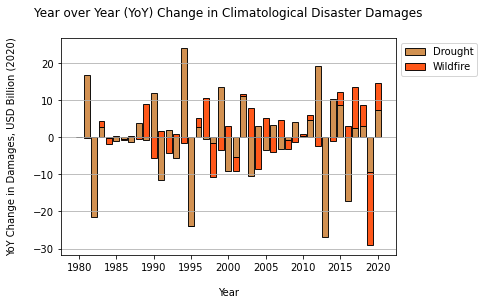

In [36]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER DAMAGES SINGLE LINE PLOT

costs_change_data = np.array([drought_costs_change, wildfire_costs_change])

data_shape = np.shape(costs_change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(costs_change_data, **kwargs):
    cum = costs_change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(costs_change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(costs_change_data, min=0)
cumulated_data_neg = get_cumulated_array(costs_change_data, max=0)

# Re-merge negative and positive data.
row_mask = (costs_change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["peru", "orangered"]
labs = ["Drought", "Wildfire"]

#fig = plt.figure(figsize=(5,20))
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1980, 2021), costs_change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Year over Year (YoY) Change in Climatological Disaster Damages\n")
plt.xlabel("\nYear")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

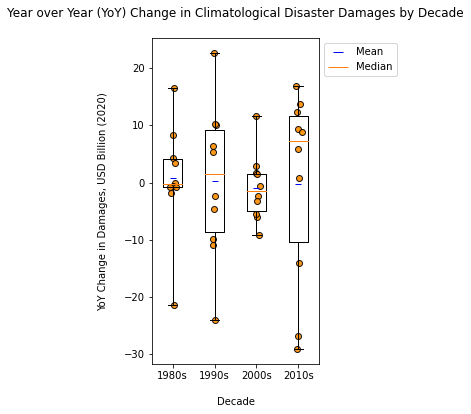

In [37]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER DAMAGES BOXPLOT

total_box_cost_data = [climatological_costs_change[0:10], climatological_costs_change[10:20], climatological_costs_change[20:30], climatological_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Climatological Disaster Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,total_box_cost_data[0], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'darkorange', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsChangePerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


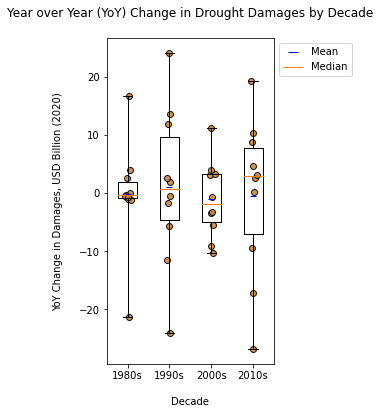

In [38]:
# YoY CHANGE IN DROUGHT DAMAGES BOXPLOT

total_box_cost_data = [drought_costs_change[0:10], drought_costs_change[10:20], drought_costs_change[20:30], drought_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Drought Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,total_box_cost_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtCostsChangePerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


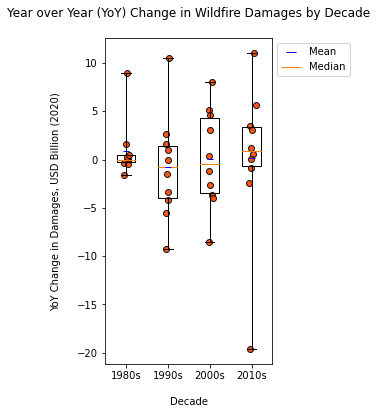

In [39]:
# YoY CHANGE IN WILDFIRE DAMAGES BOXPLOT

total_box_cost_data = [wildfire_costs_change[0:10], wildfire_costs_change[10:20], wildfire_costs_change[20:30], wildfire_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Wildfire Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100], showmeans=True, meanprops={"marker":"_","markerfacecolor":"blue", "markeredgecolor":"blue"})

mean_marker = mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='Mean')
median_marker = mlines.Line2D([], [], color='C1', marker='_', linestyle='None', markersize=20, label='Median')

lgd = plt.legend(handles=[mean_marker, median_marker], bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter(x0,total_box_cost_data[0], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'orangered', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfireCostsChangePerYearBOX.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


# YEAR OVER YEAR (YoY) CHANGE IN CLIMATOLOGICAL DISASTER DAMAGES STATISTICS

In [40]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER DAMAGES STATISTICS

print("YoY CHANGE IN CLIMATOLOGICAL DISASTER DAMAGES STATISTICS")

# YoY change in climatological disaster damages (total statistics)
print("\nYoY change in climatological disaster damages (total statistics): ")
print(climatological_costs_change.describe())

# YoY change in climatological disaster damages (1980s statistics)
print("\nYoY change in climatological disaster damages (1980s statistics): ")
print(climatological_costs_change[0:10].describe())

# YoY change in climatological disaster damages (1990s statistics)
print("\nYoY change in climatological disaster damages (1990s statistics): ")
print(climatological_costs_change[10:20].describe())

# YoY change in climatological disaster damages (2000s statistics)
print("\nYoY change in climatological disaster damages (2000s statistics): ")
print(climatological_costs_change[20:30].describe())

# YoY change in climatological disaster damages (2010s statistics)
print("\nYoY change in climatological disaster damages (2010s statistics): ")
print(climatological_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN CLIMATOLOGICAL DISASTER DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN CLIMATOLOGICAL DISASTER DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in climatological disasters damages (1980s-2010s)
climatological_damages_yoy_change_mean_1980s = climatological_costs_change[0:10].mean()
climatological_damages_yoy_change_mean_2010s = climatological_costs_change[30:40].mean()
climatological_damages_yoy_change_mean_percent_change_1980_to_2020 = 100*(climatological_damages_yoy_change_mean_2010s-climatological_damages_yoy_change_mean_1980s)/abs(climatological_damages_yoy_change_mean_1980s)
print("Change in mean YoY change in climatological disasters damages (1980s-2010s): {:.2f}%".format(climatological_damages_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in climatological disasters damages (1980s-2010s)
climatological_damages_yoy_change_max_1980s = climatological_costs_change[0:10].max()
climatological_damages_yoy_change_max_2010s = climatological_costs_change[30:40].max()
climatological_damages_yoy_change_max_percent_change_1980_to_2020 = 100*(climatological_damages_yoy_change_max_2010s-climatological_damages_yoy_change_max_1980s)/abs(climatological_damages_yoy_change_max_1980s)
print("Change in maximum YoY change in climatological disasters damages (1980s-2010s): {:.2f}%".format(climatological_damages_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in climatological disasters damages (1980s-2010s)
climatological_damages_yoy_change_min_1980s = climatological_costs_change[0:10].min()
climatological_damages_yoy_change_min_2010s = climatological_costs_change[30:40].min()
climatological_damages_yoy_change_min_percent_change_1980_to_2020 = 100*(climatological_damages_yoy_change_min_2010s-climatological_damages_yoy_change_min_1980s)/abs(climatological_damages_yoy_change_min_1980s)
print("Change in minimum YoY change in climatological disasters damages (1980s-2010s): {:.2f}%".format(climatological_damages_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in climatological disasters damages (1980s-2010s)
climatological_damages_yoy_change_std_1980s = climatological_costs_change[0:10].std()
climatological_damages_yoy_change_std_2010s = climatological_costs_change[30:40].std()
climatological_damages_yoy_change_std_percent_change_1980_to_2020 = 100*(climatological_damages_yoy_change_std_2010s-climatological_damages_yoy_change_std_1980s)/abs(climatological_damages_yoy_change_std_1980s)
print("Change in standard deviation of YoY change in climatological disasters damages (1980s-2010s): {:.2f}%".format(climatological_damages_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN CLIMATOLOGICAL DISASTER DAMAGES STATISTICS

YoY change in climatological disaster damages (total statistics): 
count    41.000000
mean      0.337282
std      11.790324
min     -29.134657
25%      -4.669698
50%       0.859325
75%       8.782984
max      22.659881
dtype: float64

YoY change in climatological disaster damages (1980s statistics): 
count    10.000000
mean      0.746137
std       9.614422
min     -21.384256
25%      -0.697982
50%      -0.309854
75%       4.115387
max      16.600856
dtype: float64

YoY change in climatological disaster damages (1990s statistics): 
count    10.000000
mean      0.299161
std      13.373940
min     -24.030644
25%      -8.621730
50%       1.509814
75%       9.172157
max      22.659881
dtype: float64

YoY change in climatological disaster damages (2000s statistics): 
count    10.000000
mean     -0.905091
std       5.814946
min      -9.125947
25%      -4.891051
50%      -1.451507
75%       1.583597
max      11.624793
dtype: float64

Yo

In [41]:
# YoY CHANGE IN DROUGHT DAMAGES STATISTICS

print("YoY CHANGE IN DROUGHT DAMAGES STATISTICS")

# YoY change in drought damages (total statistics)
print("\nYoY change in drought damages (total statistics): ")
print(drought_costs_change.describe())

# YoY change in drought damages (1980s statistics)
print("\nYoY change in drought damages (1980s statistics): ")
print(drought_costs_change[0:10].describe())

# YoY change in drought damages (1990s statistics)
print("\nYoY change in drought damages (1990s statistics): ")
print(drought_costs_change[10:20].describe())

# YoY change in drought damages (2000s statistics)
print("\nYoY change in drought damages (2000s statistics): ")
print(drought_costs_change[20:30].describe())

# YoY change in drought damages (2010s statistics)
print("\nYoY change in drought damages (2010s statistics): ")
print(drought_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN DROUGHT DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN DROUGHT DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in drought damages (1980s-2010s)
drought_damages_yoy_change_mean_1980s = drought_costs_change[0:10].mean()
drought_damages_yoy_change_mean_2010s = drought_costs_change[30:40].mean()
drought_damages_yoy_change_mean_percent_change_1980_to_2020 = 100*(drought_damages_yoy_change_mean_2010s-drought_damages_yoy_change_mean_1980s)/abs(drought_damages_yoy_change_mean_1980s)
print("Change in mean YoY change in drought damages (1980s-2010s): {:.2f}%".format(drought_damages_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in drought damages (1980s-2010s)
drought_damages_yoy_change_max_1980s = drought_costs_change[0:10].max()
drought_damages_yoy_change_max_2010s = drought_costs_change[30:40].max()
drought_damages_yoy_change_max_percent_change_1980_to_2020 = 100*(drought_damages_yoy_change_max_2010s-drought_damages_yoy_change_max_1980s)/abs(drought_damages_yoy_change_max_1980s)
print("Change in maximum YoY change in drought damages (1980s-2010s): {:.2f}%".format(drought_damages_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in drought damages (1980s-2010s)
drought_damages_yoy_change_min_1980s = drought_costs_change[0:10].min()
drought_damages_yoy_change_min_2010s = drought_costs_change[30:40].min()
drought_damages_yoy_change_min_percent_change_1980_to_2020 = 100*(drought_damages_yoy_change_min_2010s-drought_damages_yoy_change_min_1980s)/abs(drought_damages_yoy_change_min_1980s)
print("Change in minimum YoY change in drought damages (1980s-2010s): {:.2f}%".format(drought_damages_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in drought damages (1980s-2010s)
drought_damages_yoy_change_std_1980s = drought_costs_change[0:10].std()
drought_damages_yoy_change_std_2010s = drought_costs_change[30:40].std()
drought_damages_yoy_change_std_percent_change_1980_to_2020 = 100*(drought_damages_yoy_change_std_2010s-drought_damages_yoy_change_std_1980s)/abs(drought_damages_yoy_change_std_1980s)
print("Change in standard deviation of YoY change in drought damages (1980s-2010s): {:.2f}%".format(drought_damages_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN DROUGHT DAMAGES STATISTICS

YoY change in drought damages (total statistics): 
count    41.000000
mean      0.067655
std      10.709382
min     -26.874076
25%      -3.475204
50%       0.000000
75%       4.083193
max      24.181190
dtype: float64

YoY change in drought damages (1980s statistics): 
count    10.000000
mean     -0.137191
std       9.194928
min     -21.384256
25%      -0.841625
50%      -0.300415
75%       2.024857
max      16.682244
dtype: float64

YoY change in drought damages (1990s statistics): 
count    10.000000
mean      1.114640
std      13.566072
min     -23.993793
25%      -4.666554
50%       0.724064
75%       9.653272
max      24.181190
dtype: float64

YoY change in drought damages (2000s statistics): 
count    10.000000
mean     -1.011286
std       6.609621
min     -10.320577
25%      -4.936229
50%      -1.866178
75%       3.330870
max      11.236579
dtype: float64

YoY change in drought damages (2010s statistics): 
count    10.000000
mean     -0.

In [42]:
# YoY CHANGE IN WILDFIRE DAMAGES STATISTICS

print("YoY CHANGE IN WILDFIRE DAMAGES STATISTICS")

# YoY change in wildfire damages (total statistics)
print("\nYoY change in wildfire damages (total statistics): ")
print(wildfire_costs_change.describe())

# YoY change in wildfire damages (1980s statistics)
print("\nYoY change in wildfire damages (1980s statistics): ")
print(wildfire_costs_change[0:10].describe())

# YoY change in wildfire damages (1990s statistics)
print("\nYoY change in wildfire damages (1990s statistics): ")
print(wildfire_costs_change[10:20].describe())

# YoY change in wildfire damages (2000s statistics)
print("\nYoY change in wildfire damages (2000s statistics): ")
print(wildfire_costs_change[20:30].describe())

# YoY change in wildfire damages (2010s statistics)
print("\nYoY change in wildfire damages (2010s statistics): ")
print(wildfire_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN WILDFIRE DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN WILDFIRE DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in wildfire damages (1980s-2010s)
wildfire_damages_yoy_change_mean_1980s = wildfire_costs_change[0:10].mean()
wildfire_damages_yoy_change_mean_2010s = wildfire_costs_change[30:40].mean()
wildfire_damages_yoy_change_mean_percent_change_1980_to_2020 = 100*(wildfire_damages_yoy_change_mean_2010s-wildfire_damages_yoy_change_mean_1980s)/abs(wildfire_damages_yoy_change_mean_1980s)
print("Change in mean YoY change in wildfire damages (1980s-2010s): {:.2f}%".format(wildfire_damages_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in wildfire damages (1980s-2010s)
wildfire_damages_yoy_change_max_1980s = wildfire_costs_change[0:10].max()
wildfire_damages_yoy_change_max_2010s = wildfire_costs_change[30:40].max()
wildfire_damages_yoy_change_max_percent_change_1980_to_2020 = 100*(wildfire_damages_yoy_change_max_2010s-wildfire_damages_yoy_change_max_1980s)/abs(wildfire_damages_yoy_change_max_1980s)
print("Change in maximum YoY change in wildfire damages (1980s-2010s): {:.2f}%".format(wildfire_damages_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in wildfire damages (1980s-2010s)
wildfire_damages_yoy_change_min_1980s = wildfire_costs_change[0:10].min()
wildfire_damages_yoy_change_min_2010s = wildfire_costs_change[30:40].min()
wildfire_damages_yoy_change_min_percent_change_1980_to_2020 = 100*(wildfire_damages_yoy_change_min_2010s-wildfire_damages_yoy_change_min_1980s)/abs(wildfire_damages_yoy_change_min_1980s)
print("Change in minimum YoY change in wildfire damages (1980s-2010s): {:.2f}%".format(wildfire_damages_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in wildfire damages (1980s-2010s)
wildfire_damages_yoy_change_std_1980s = wildfire_costs_change[0:10].std()
wildfire_damages_yoy_change_std_2010s = wildfire_costs_change[30:40].std()
wildfire_damages_yoy_change_std_percent_change_1980_to_2020 = 100*(wildfire_damages_yoy_change_std_2010s-wildfire_damages_yoy_change_std_1980s)/abs(wildfire_damages_yoy_change_std_1980s)
print("Change in standard deviation of YoY change in wildfire damages (1980s-2010s): {:.2f}%".format(wildfire_damages_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN WILDFIRE DAMAGES STATISTICS

YoY change in wildfire damages (total statistics): 
count    41.000000
mean      0.269627
std       5.494296
min     -19.661190
25%      -1.631316
50%       0.066152
75%       3.013814
max      11.051805
dtype: float64

YoY change in wildfire damages (1980s statistics): 
count    10.000000
mean      0.883328
std       2.937397
min      -1.631316
25%      -0.250908
50%       0.000000
75%       0.433254
max       8.914672
dtype: float64

YoY change in wildfire damages (1990s statistics): 
count    10.000000
mean     -0.815478
std       5.386060
min      -9.213836
25%      -3.948543
50%      -0.779080
75%       1.426412
max      10.523027
dtype: float64

YoY change in wildfire damages (2000s statistics): 
count    10.000000
mean      0.106195
std       5.086486
min      -8.543331
25%      -3.448600
50%      -0.412230
75%       4.253782
max       8.028089
dtype: float64

YoY change in wildfire damages (2010s statistics): 
count    10.000000
mean  